<hr style="color:green" />
<h1 style="color:green">COSC2673 Assignment 2: Image Classification for Cancerous Cells</h1>
<h2 style="color:green">File 01: Data Exploration</h2>
<hr style="color:green" />

<p>In this file, load the initial label files and do a basic examination of the contents</p>

In [19]:
# Import the required libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import data_basic_utility as dbutil
import graphing_utility as graphutil
import statistics_utility as statsutil

# run this to have a randomised seed every time. For reproducable results, set this to a constant
random_seed = dbutil.get_random_seed()

Load the files

In [20]:
# Use these locations for Google Colab, where we need the Github version of the file
# locationMain = "https://raw.githubusercontent.com/s2105802-Nelson/COSC2673-A2-Group42/main/Image_classification_data/data_labels_mainData.csv?token=GHSAT0AAAAAACBUMPCH5CK2I562VIUK4US4ZCB3SFQ"
# locationExtra = "https://raw.githubusercontent.com/s2105802-Nelson/COSC2673-A2-Group42/main/Image_classification_data/data_labels_extraData.csv?token=GHSAT0AAAAAACBUMPCHQZ5H2FWD4IEFU7WUZCB3SZA"

# Use these locations for Nelson's local version of the file
locationMain = "./Image_classification_data/data_labels_mainData.csv"
locationExtra = "./Image_classification_data/data_labels_extraData.csv"

dfMain = pd.read_csv(locationMain)
dfExtra = pd.read_csv(locationExtra)

dfMain.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [21]:
dfExtra.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


First, examine the Main dataset. Review of the data, structure, types and formats. If there are any basic errors, fix or clean.

In [22]:
statsutil.df_basic_data_info(dfMain, "dfMain", largeTextWarning=False)

Dataframe Name: dfMain
Dataframe Shape (rows / columns): (9896, 6)
-----------------------------

dataframe.info()
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB
None
-----------------------------

dataframe.describe()
--------------------
         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.0000

Visualize how many records we have for our target labels, 
1) Binary Classification, isCancerous
2) Multi Classification, cellTypeName

<module 'matplotlib.pyplot' from 'C:\\Users\\nelso\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

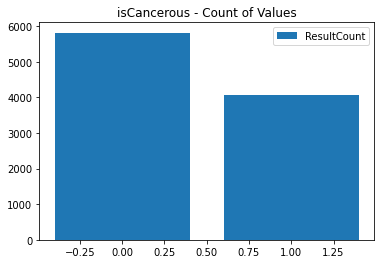

In [23]:

graphutil.graphBasicBarDistribution(dfMain, "isCancerous")

<module 'matplotlib.pyplot' from 'C:\\Users\\nelso\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

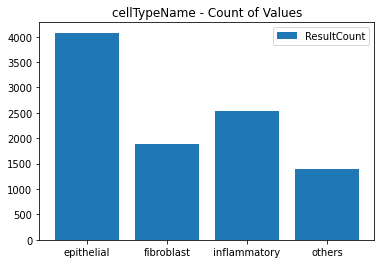

In [24]:
graphutil.graphBasicBarDistribution(dfMain, "cellTypeName")

<module 'matplotlib.pyplot' from 'C:\\Users\\nelso\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

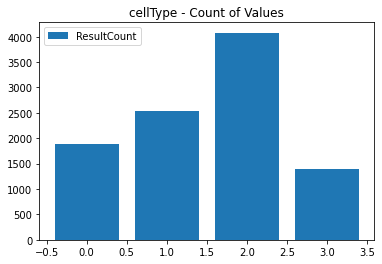

In [25]:
graphutil.graphBasicBarDistribution(dfMain, "cellType")

In [26]:
dfExtra.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [27]:
statsutil.df_basic_data_info(dfExtra, "dfExtra")

Dataframe Name: dfExtra
Dataframe Shape (rows / columns): (10384, 4)
-----------------------------

dataframe.info()
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB
None
-----------------------------

dataframe.describe()
--------------------
         InstanceID    patientID   isCancerous
count  10384.000000  10384.00000  10384.000000
mean   12087.866333     80.38203      0.287943
std     6173.866838      9.40388      0.452826
min     1631.000000     61.00000      0.000000
25%     6655.750000     71.00000      0.000000
50%    12377.500000     81.00000      0.000000
75%    16374.250000     88.00000      1.000000
ma